[-1.07027644  0.43509991  1.45876975  2.45231117  3.25019198  4.49965087]
[0.22969786 0.22959429 0.22980413 0.230223   0.23071056 0.23173803]
-57.42085713502644 0.13153057687865188


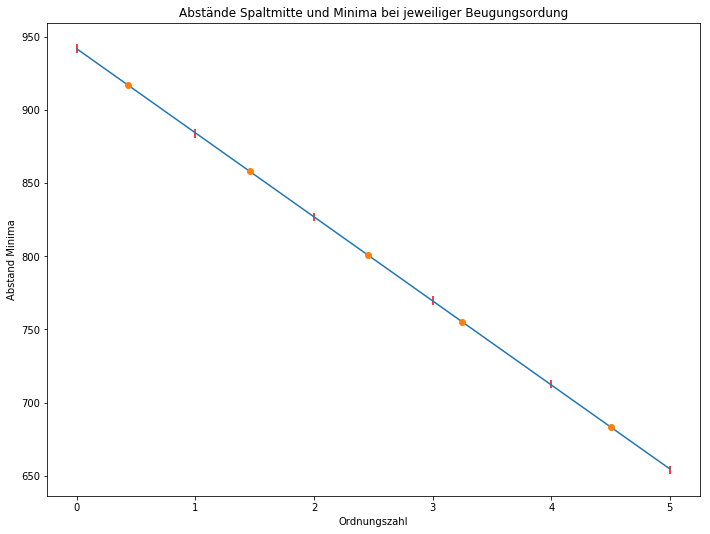

In [9]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#Mittellung über beide Messungen
#Messwerte für Minima eintragen
min_0=[(942.7+940.97)/2,883.92,(828.6+825.15)/2,(771.55+768.09)/2,712.77,(655.72+652.26)/2]
ordnung=np.array([0,1,2,3,4,5])
#hier deine Fehler eintragen für die y Achse
error1=np.array([3,3,3,3,3,3])
min_abstand_1=np.array(min_0)

def line(x, a, b):
    return a * x + b
popt, pcov = curve_fit(line, ordnung,min_abstand_1)

#Hier werte Eingeben von denen man die Zahl n(ordnung) haben möchte
max_0=np.array([1003.21,916.77,857.99,800.94,(742.16+768.09)/2,683.38])
#Inwertierung der fer gefitteten Geradengleichung
max_0_x=(max_0-popt[1])/(popt[0])

#der Fehler von max_0_x kann über Fehlerfortpflanzung berechnet werden
d_max_0_x=np.sqrt((3/popt[0])**2 +(np.sqrt(pcov[1,1])/popt[0])**2+
                  (((max_0-popt[1])*np.sqrt(pcov[0,0]))/(popt[0]**2))**2)**(1/2)
print(max_0_x)
print(d_max_0_x)

plt.figure(figsize=(15,15))
plt.errorbar(ordnung,min_abstand_1,yerr=error1,ecolor="red",fmt="none")
plt.plot(ordnung,line(ordnung,popt[0],popt[1]))
#[1::] heißt den ersten Werte skippen, wenn man ihn behalten will [1::] entfernen
plt.plot(max_0_x[1::],max_0[1::],"o")
plt.xlabel("Ordnungszahl")
plt.ylabel("Abstand Minima")
plt.title('Abstände Spaltmitte und Minima bei jeweiliger Beugungsordung')

fig=plt.gcf()
fig.set_size_inches(11.69, 8.7)
plt.savefig("C:/Users/lorena/Desktop/Abstände Spaltmitte und Minima", format="pdf")
print(popt[0],np.sqrt(pcov[0,0]))

